In [1]:
from ensembles import VanillaEnsemble
from datasets import make_dataset, make_cross_validation_dataset
from plot import plot_dataset, plot_prediction, train_and_plot, plot_error
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [16, 4]
from evaluation import evaluate_model
import tensorflow as tf

from tqdm import tqdm


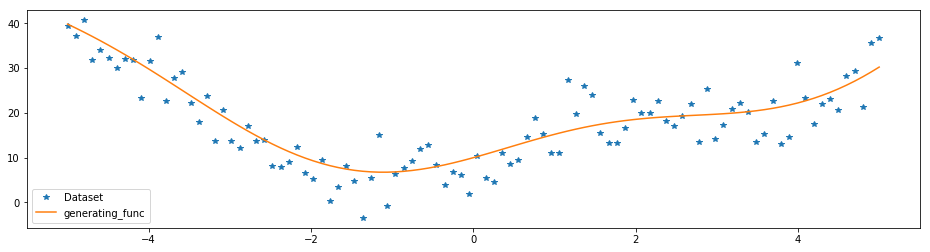

In [2]:
num_epochs = 10
num_eps = 75#100#75#25
#seed = 43#43 is cool 101 1011
from global_vars import SEED as seed

params = {'num_neurons':[20,20,10],
          'num_epochs':num_epochs,
          'learning_rate':0.001,
          'seed':seed,
          'optimizer':tf.train.AdamOptimizer,
         'keep_prob':0.8,
         'num_samples':15}
    
data = make_dataset(train_p=0.8,seed=seed)

X = data['X']
y = data['y']
X_test = data['X_test']
y_test = data['y_test']
generate_sinoid = data['generating']
#sorted_index = data['train_index']
sorted_index = data['shuffle_index']
#test_index = data['test_ind']

plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

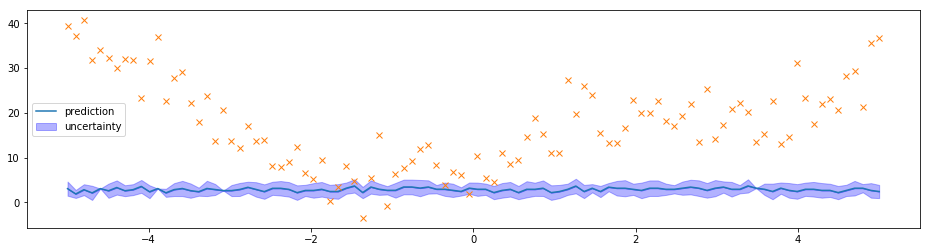

In [3]:
from dropout import DropoutNetwork
dropout = DropoutNetwork(**params)


preds = dropout.predict(X)
var = dropout.predict_var(X)

plot_prediction(X,
                preds,
                sorted_index,
                var)
plt.plot(X,y,'x')

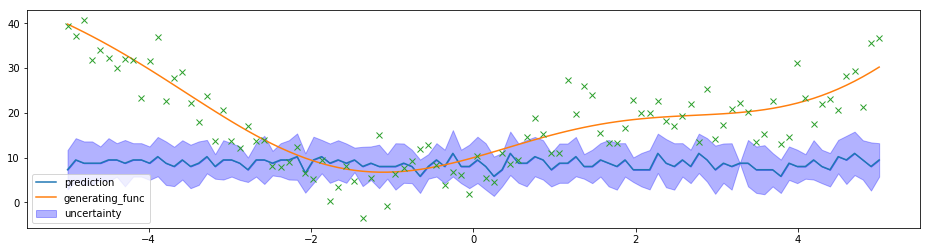

RSME is 13.091570854187012
COVERAGE PROBABILITY is 0.26
MEAN VARIANCE is 4.202149391174316
COVERAGE/MEAN_VAR is 0.06187309774042598
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.052166134, 0.6062358451675557)


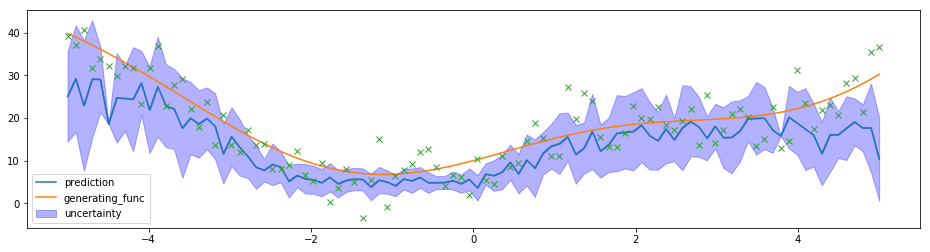

RSME is 6.909244060516357
COVERAGE PROBABILITY is 0.65
MEAN VARIANCE is 6.179696559906006
COVERAGE/MEAN_VAR is 0.10518315805620829
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.31112325, 0.0016287973311493432)


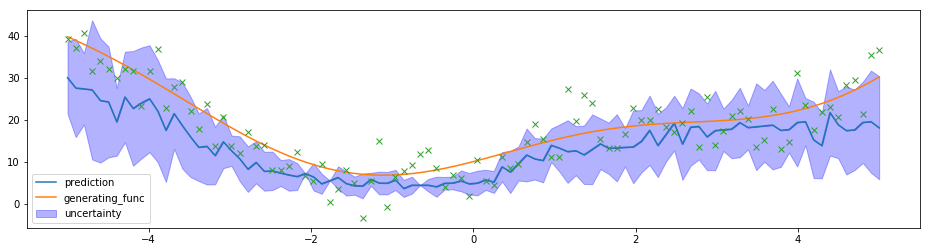

RSME is 6.607897758483887
COVERAGE PROBABILITY is 0.61
MEAN VARIANCE is 6.587792873382568
COVERAGE/MEAN_VAR is 0.09259550379379025
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.4065206, 2.7067660032715698e-05)


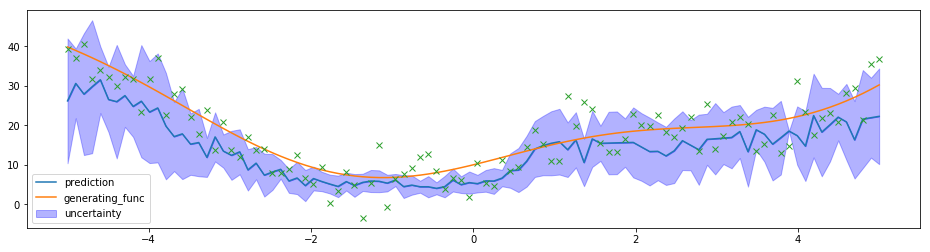

RSME is 6.337514877319336
COVERAGE PROBABILITY is 0.67
MEAN VARIANCE is 6.6834716796875
COVERAGE/MEAN_VAR is 0.10024730141915217
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.33018166, 0.0007938992756928114)


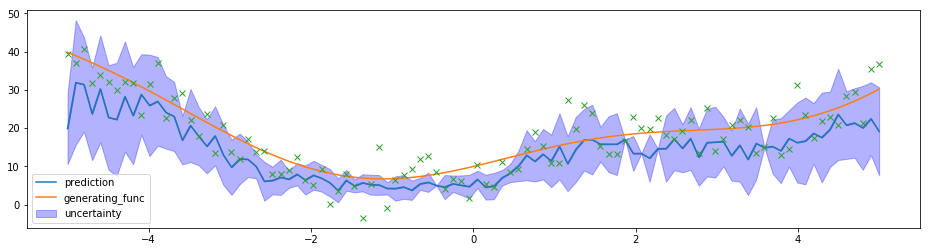

RSME is 6.289202690124512
COVERAGE PROBABILITY is 0.67
MEAN VARIANCE is 6.631600856781006
COVERAGE/MEAN_VAR is 0.10103141224413491
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.2584523, 0.009423392053842244)


In [4]:
errors = train_and_plot(dropout,X,y,sorted_index,generating_func=generate_sinoid,
               num_eps=num_eps)

In [5]:
for i,b in enumerate([10,10,10]):
    print(i,b)

0 10
1 10
2 10


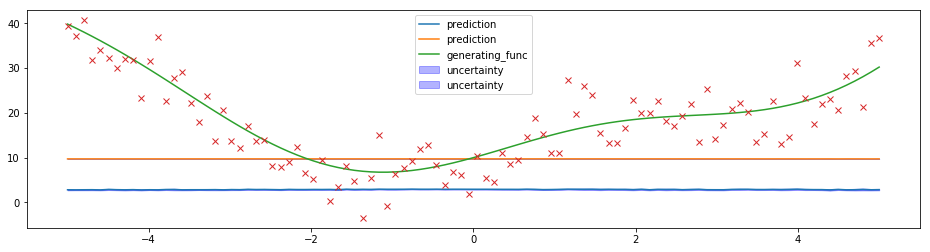

RSME is 12.497977256774902
COVERAGE PROBABILITY is 0.0
MEAN VARIANCE is 0.0022256525699049234
COVERAGE/MEAN_VAR is 0.0
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.2596158, 0.009096544199655533)


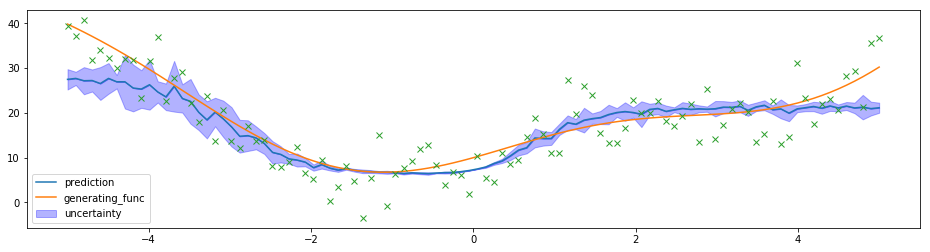

RSME is 5.331684589385986
COVERAGE PROBABILITY is 0.24
MEAN VARIANCE is 1.6686713695526123
COVERAGE/MEAN_VAR is 0.14382700175670085
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.023268605, 0.818253628862538)


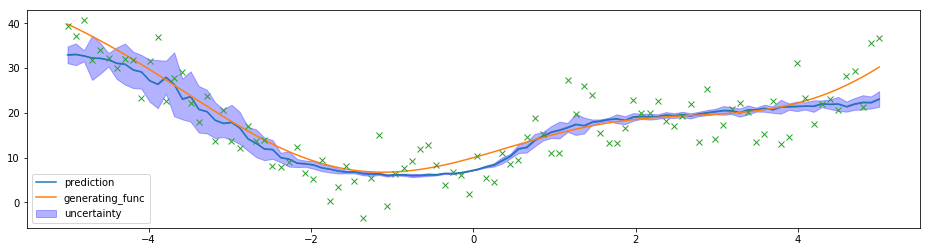

RSME is 4.797037601470947
COVERAGE PROBABILITY is 0.23
MEAN VARIANCE is 1.5453797578811646
COVERAGE/MEAN_VAR is 0.14883073162246402
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (-0.0073874015, 0.9418489127476111)


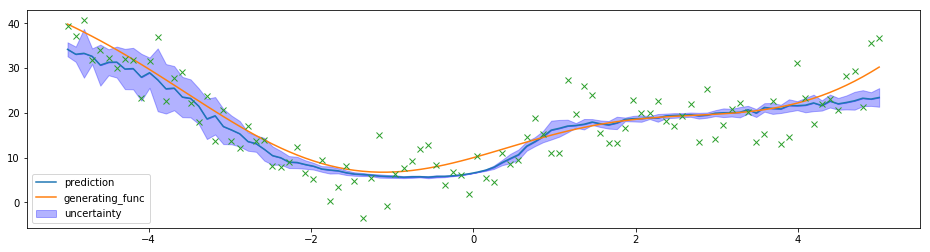

RSME is 4.629273414611816
COVERAGE PROBABILITY is 0.25
MEAN VARIANCE is 1.586485743522644
COVERAGE/MEAN_VAR is 0.15758099372825013
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.075778864, 0.4536524628119649)


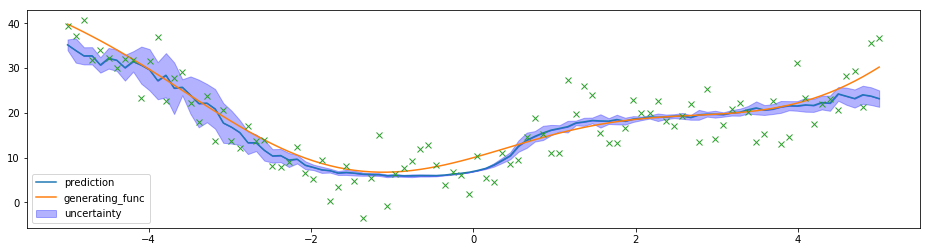

RSME is 4.639438629150391
COVERAGE PROBABILITY is 0.21
MEAN VARIANCE is 1.4408854246139526
COVERAGE/MEAN_VAR is 0.14574371869731695
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.066555545, 0.5105909395104691)


In [6]:
from dropout import DropoutNetwork
params['dropout_layers']=[0]
dropout = DropoutNetwork(**params)


preds = dropout.predict(X)
var = dropout.predict_var(X)

plot_prediction(X,
                preds,
                sorted_index,
                var)
errors = train_and_plot(dropout,X,y,sorted_index,generating_func=generate_sinoid,
               num_eps=num_eps)